In [1]:
from tensorflow.keras.models import load_model
from resize_image import resize_image
from imutils import paths
import numpy as np
import imutils
import cv2
import pickle
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
MODEL_FILENAME = "model_nn.hdf5"
MODEL_LABELS_FILENAME = "model_labels.dat"
IMAGE = "T36H.png"
PIXEL_MARGIN = 3
IMAGE_SIZE_X = 20
IMAGE_SIZE_Y = 20

In [3]:
# Odczyt modelu etykiet do pliku
with open(MODEL_LABELS_FILENAME, "rb") as f:
    lb = pickle.load(f)

In [4]:
# Załadowanie modelu sieci neuronowej
model = load_model(MODEL_FILENAME)

In [5]:
# Odczyt pliku za pomoca opencv 
image = cv2.imread(IMAGE)
# Przetworzenie obrazu z RBG do odcieni szarosci
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Progowanie zdjęcia tak aby było czarno biale a nie w odcieniach szarosci
thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

# Wykrywanie konturow na zdjeciu 
contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] 

letter_image_regions = []

# Przetwarzanie konturow na regiony ze znakami zdjec
for contour in contours:
    # Pobranie danych o wielkosci i polozeniu  konturu
    (x, y, w, h) = cv2.boundingRect(contour)
    letter_image_regions.append((x, y, w, h))

# Zakladamy, ze nasze obrazy posiadaja taka sama liczbe znakow.
# Sprawdzenie czy udalo sie wykryc 4 kontury
if len(letter_image_regions) != 4:
    print("Error: len(letter_image_regions) != 4")

# Sortowanie wykrytych znakow tak aby isc od lewej do prawej
letter_image_regions = sorted(letter_image_regions, key=lambda x: x[0])

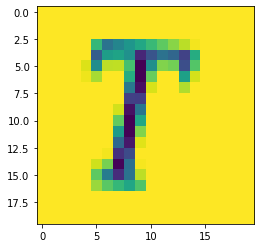

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
J


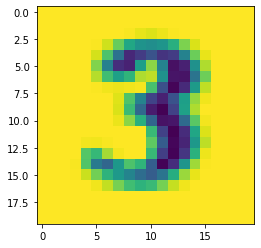

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0.]]
W


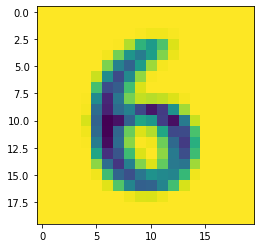

[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 0.000000e+00 4.239656e-35 0.000000e+00
  0.000000e+00 0.000000e+00]]
J


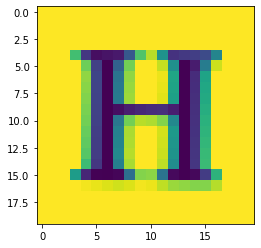

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]]
J


In [8]:
# Zapisywanie poszczegolnych znakow z obrazu do osobnych plikow
for letter_bounding_box in letter_image_regions:
    # Pobranie danych o wielkosci i polozeniu znaku
    x, y, w, h = letter_bounding_box
    # Wyciecie znaku z obrazu wraz z dodatkowym marginesem 
    letter_image = image[y - PIXEL_MARGIN:y + h + PIXEL_MARGIN, x - PIXEL_MARGIN:x + w + PIXEL_MARGIN]
    # Skalowanie zdjecia do wielkosci 20x20
    letter_image = resize_image(letter_image, IMAGE_SIZE_X, IMAGE_SIZE_Y)
    plt.imshow(letter_image) 
    plt.show()
    # Przetworzenie zdjecia tak aby ostatecznie znajdowalo sie w 4 wymiarach (1,20,20,1)
    letter_image = np.expand_dims(letter_image, axis=2)
    letter_image = np.expand_dims(letter_image, axis=0)    
    letter_image = tf.cast(letter_image, tf.float32)
    # Predykcja
    prediction = model.predict(np.array(letter_image))
    print(prediction)
    # Przetworzenie odpowiedzi sieci neuronowej na znak
    letter = lb.inverse_transform(prediction)[0]

    print(letter)